In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers,models
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Dense, Flatten, Activation


In [2]:
import pickle

X_train = pickle.load(open("X_train.pickle","rb"))
y_train = pickle.load(open("y_train.pickle","rb"))
X_test = pickle.load(open("X_test.pickle","rb"))
y_test = pickle.load(open("y_test.pickle","rb"))


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
model = models.Sequential()

model.add(Conv2D(16,(3,3),padding="same",input_shape = X_train.shape[1:]))
model.add(Conv2D(32,(3,3),padding="same"))
model.add(layers.ReLU()) 
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  
model.add(Conv2D(32,(3,3),padding="same"))
model.add(layers.ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))    
    
model.add(Conv2D(32,(3,3),padding="same"))
model.add(layers.ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(1024))
model.add(layers.ReLU())

model.add(Dense(10))
model.add(Activation('softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)         

In [20]:
#compler
from keras.optimizers import RMSprop
model.compile(loss= "categorical_crossentropy",
             optimizer =RMSprop(lr=0.001),
             metrics=["accuracy"])

In [21]:
from keras.preprocessing.image import ImageDataGenerator

# augumenting
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest')

In [22]:
datagen.fit(X_train)

In [23]:
BATCH_SIZE = 128
NB_EPOCH = 50

In [24]:
# train
history = model.fit_generator(datagen.flow(X_train, y_train,
                                           batch_size=BATCH_SIZE),
                              steps_per_epoch=50000//128,
                              epochs=NB_EPOCH,
                              validation_data = (X_test,y_test),
                             validation_steps=10000//128)

Epoch 1/50
390/390 [==============================] - 38s 55ms/step - loss: 2.1162 - accuracy: 0.2168 - val_loss: 1.6131 - val_accuracy: 0.4150
Epoch 2/50
390/390 [==============================] - 22s 55ms/step - loss: 1.7533 - accuracy: 0.3606 - val_loss: 1.5762 - val_accuracy: 0.4407
Epoch 3/50
390/390 [==============================] - 23s 59ms/step - loss: 1.6223 - accuracy: 0.4165 - val_loss: 1.6034 - val_accuracy: 0.4348
Epoch 4/50
390/390 [==============================] - 24s 60ms/step - loss: 1.5455 - accuracy: 0.4453 - val_loss: 1.3294 - val_accuracy: 0.5211s - loss: 1.5621 - accuracy: 0 - ETA: 1 - ETA: 16s - loss: 1.5566 - accuracy: 0 - ETA: 15s - loss: 1.5563 - accuracy: 0.442 - ETA: 15s -  - ETA: 13s - loss: 1.5548 - accuracy: 0.4 - E - ETA: 11s - loss: 1.5526 - accuracy: 0.443 - ETA: 11s - los - ETA: 2s - loss:
Epoch 5/50
390/390 [==============================] - 24s 62ms/step - loss: 1.4778 - accuracy: 0.4690 - val_loss: 1.3505 - val_accuracy: 0.5199 loss: 1.48 - ETA: 

390/390 [==============================] - 30s 77ms/step - loss: 1.0963 - accuracy: 0.6138 - val_loss: 1.0815 - val_accuracy: 0.6377
Epoch 26/50
390/390 [==============================] - 32s 82ms/step - loss: 1.0800 - accuracy: 0.6181 - val_loss: 1.0923 - val_accuracy: 0.6383
Epoch 27/50
390/390 [==============================] - 36s 92ms/step - loss: 1.0765 - accuracy: 0.6219 - val_loss: 1.1264 - val_accuracy: 0.6237
Epoch 28/50
390/390 [==============================] - 34s 88ms/step - loss: 1.0657 - accuracy: 0.6251 - val_loss: 1.0511 - val_accuracy: 0.6412
Epoch 29/50
390/390 [==============================] - 33s 84ms/step - loss: 1.0667 - accuracy: 0.6212 - val_loss: 0.9758 - val_accuracy: 0.6631
Epoch 30/50
390/390 [==============================] - 32s 82ms/step - loss: 1.0638 - accuracy: 0.6228 - val_loss: 1.0953 - val_accuracy: 0.6235
Epoch 31/50
390/390 [==============================] - 33s 84ms/step - loss: 1.0614 - accuracy: 0.6269 - val_loss: 1.1006 - val_accuracy: 0.63

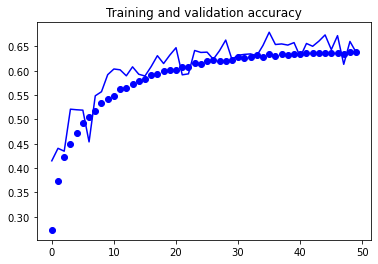

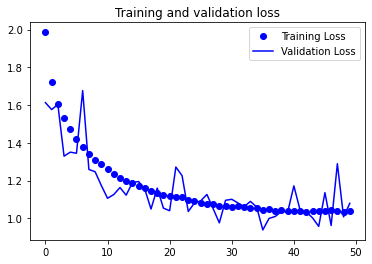

In [25]:
#visualize model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Now we use pretrained model.

There are two ways to use  a pretrained model:-<br>
Feature extraction<br>Fine-tuning.

We try both of them

### transfer learning


In [4]:
#Instantiating the VGG16 convolutional base
from keras.applications import VGG19
vgg = VGG19(weights= "imagenet",include_top=False, input_shape = (X_train.shape[1:]))

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 253f8cb515780f3b799900260a226db6 so we will re-download the data.
80142336/80134624 [==============================] - 54s 1us/step


In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [23]:
from keras.models import Model
x = Flatten()(vgg.output)
x = Dense(1024, activation=('relu'))(x)
x = Dense(512, activation=('relu'))(x)
x = Dense(256, activation=('relu'))(x)
x = Dense(128, activation = ('relu'))(x)
prediction = Dense(10, activation='softmax')(x)

In [24]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [26]:
from keras.optimizers import RMSprop
model.compile(loss= "categorical_crossentropy",
             optimizer =RMSprop(lr=0.001),
             metrics=["accuracy"])

In [27]:
from keras.preprocessing.image import ImageDataGenerator

# augumenting
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest')

In [28]:
datagen.fit(X_train)

In [29]:
BATCH_SIZE = 234
NB_EPOCH = 50

In [30]:
y_train.shape

(50000, 10)

In [31]:
y_test.shape

(10000, 10)

In [32]:
# train
history = model.fit_generator(datagen.flow(X_train, y_train,
                                           batch_size=BATCH_SIZE),
                              steps_per_epoch=50000//234,
                              epochs=NB_EPOCH,
                              validation_data = (X_test,y_test),
                             validation_steps=10000//234)

Epoch 1/50
213/213 [==============================] - 50s 140ms/step - loss: 1.9854 - accuracy: 0.2784 - val_loss: 1.5420 - val_accuracy: 0.4530
Epoch 2/50
213/213 [==============================] - 25s 119ms/step - loss: 1.6863 - accuracy: 0.3906 - val_loss: 1.5394 - val_accuracy: 0.4543
Epoch 3/50
213/213 [==============================] - 28s 130ms/step - loss: 1.6379 - accuracy: 0.4147 - val_loss: 1.4525 - val_accuracy: 0.4790
Epoch 4/50
213/213 [==============================] - 30s 139ms/step - loss: 1.6053 - accuracy: 0.4253 - val_loss: 1.4757 - val_accuracy: 0.4668
Epoch 5/50
213/213 [==============================] - 32s 148ms/step - loss: 1.5748 - accuracy: 0.4387 - val_loss: 1.4550 - val_accuracy: 0.4818
Epoch 6/50
213/213 [==============================] - 33s 154ms/step - loss: 1.5483 - accuracy: 0.4485 - val_loss: 1.4265 - val_accuracy: 0.4894
Epoch 7/50
213/213 [==============================] - 32s 151ms/step - loss: 1.5353 - accuracy: 0.4540 - val_loss: 1.4455 - val_ac

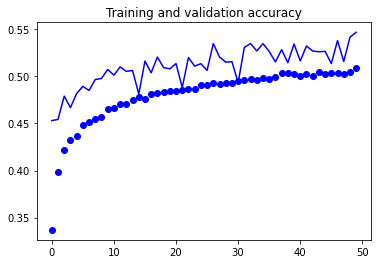

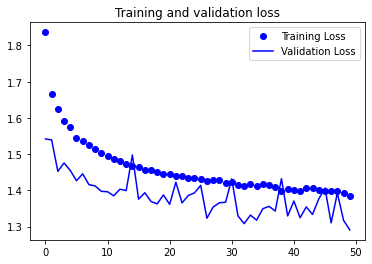

In [34]:
#visualize model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()